In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
#from radiomics.featureextractor import *
from sklearn import mixture

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
#from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [2]:
import SimpleITK as sitk  
#mask_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
#pet_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

mask_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
pet_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

In [3]:
model = WatershedModel(mask_path, pet_path, type = '4d')

In [4]:
ws_array, label_number = model.watershed_model(0.41)

In [5]:
label_number 

61

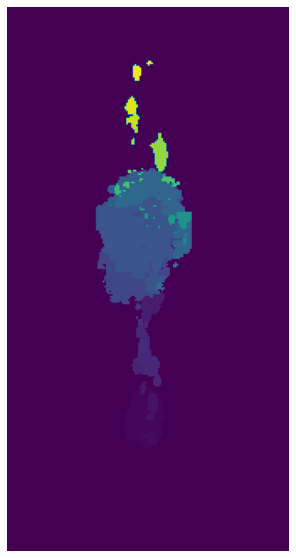

In [6]:
mip_imshow(ws_array, 0, cmap='viridis', type = 'mask')

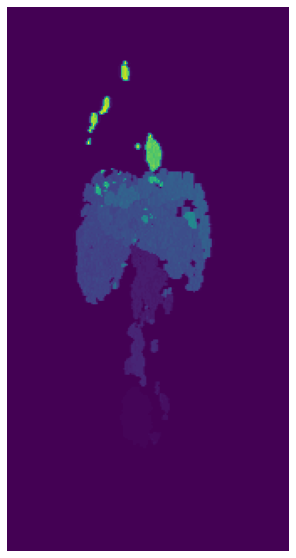

In [7]:
mip_imshow(ws_array, 45, cmap='viridis', type = 'mask')

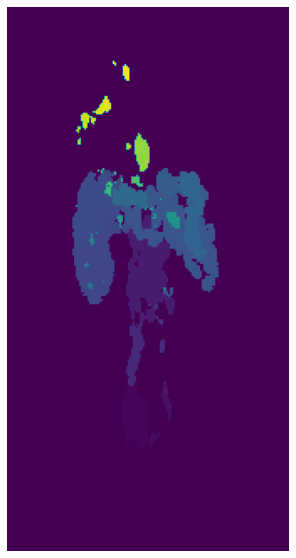

In [8]:
mip_imshow(ws_array, 90, cmap='viridis', type = 'mask')

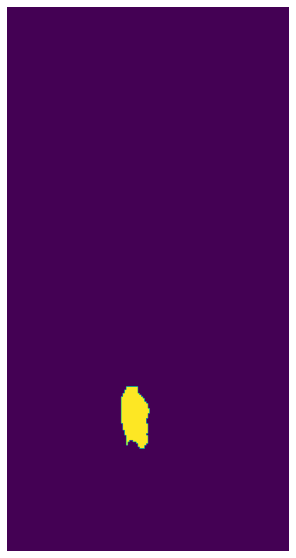

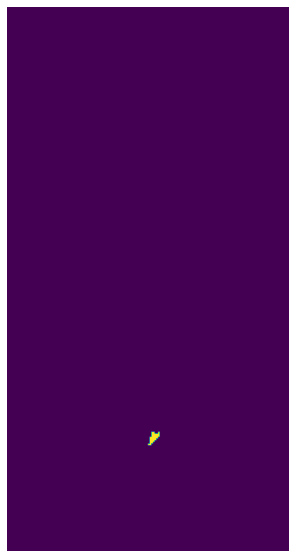

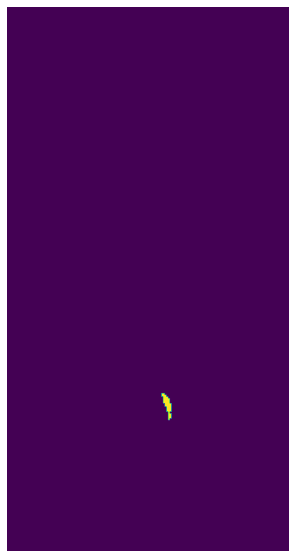

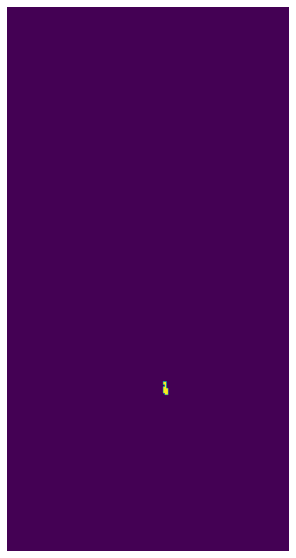

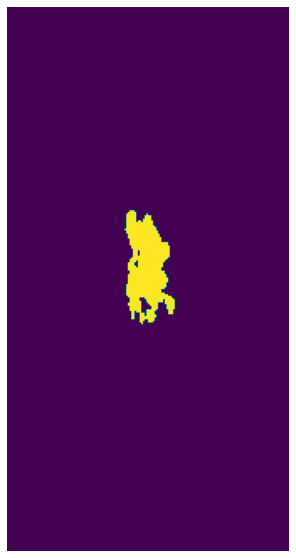

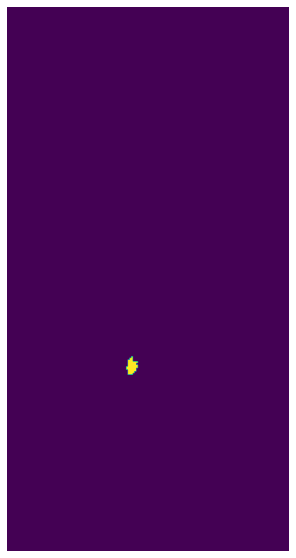

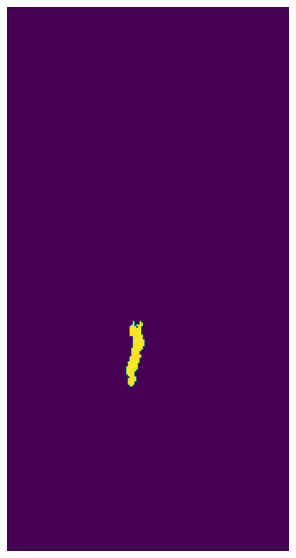

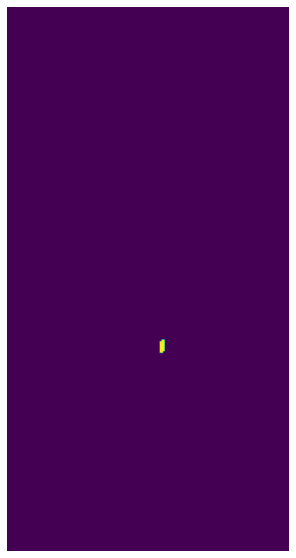

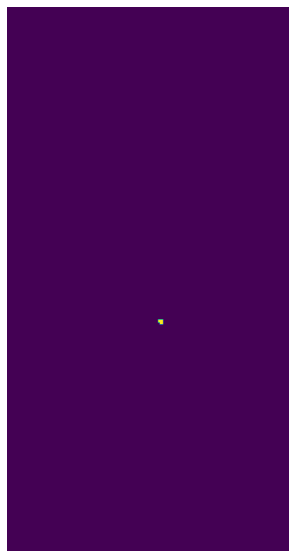

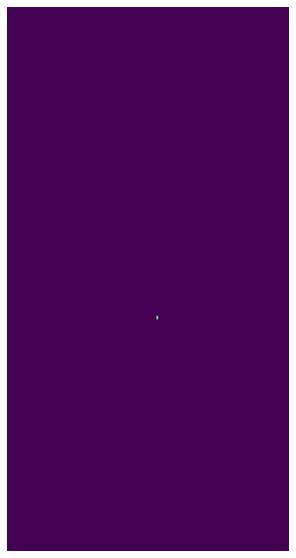

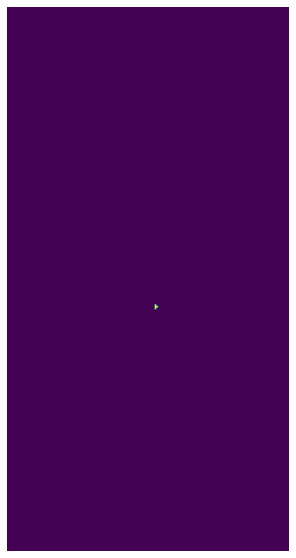

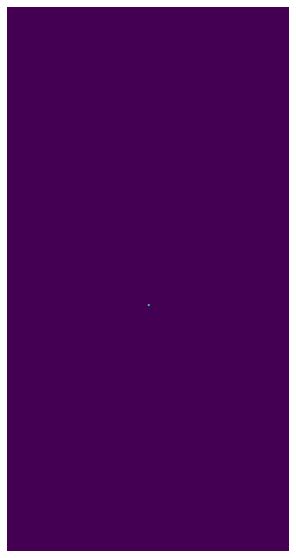

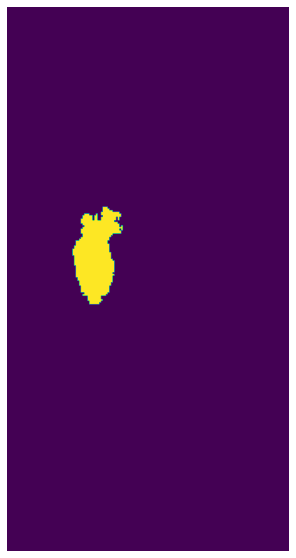

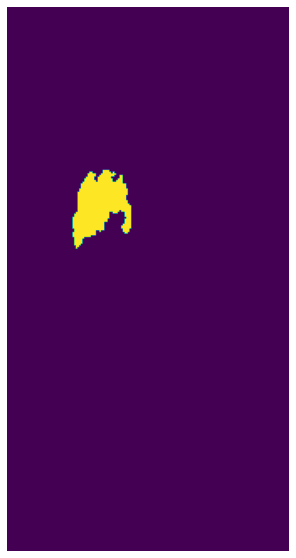

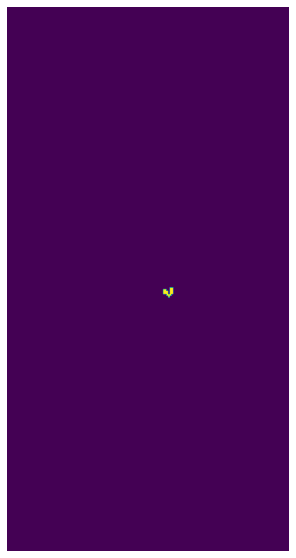

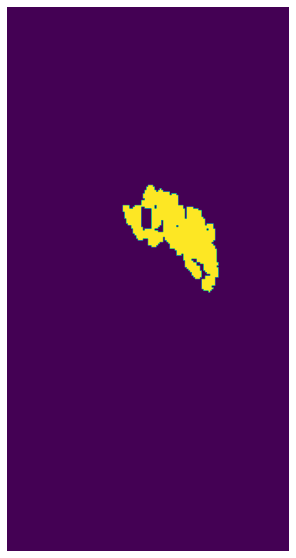

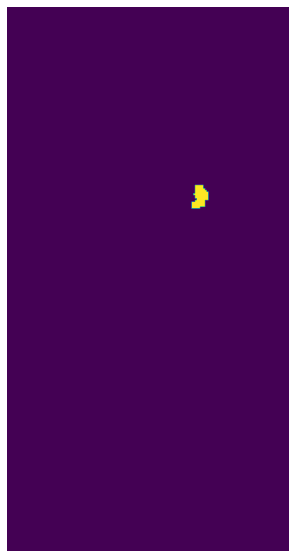

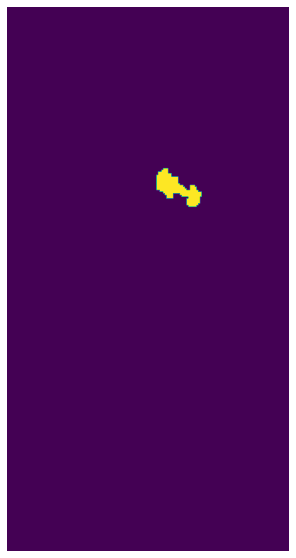

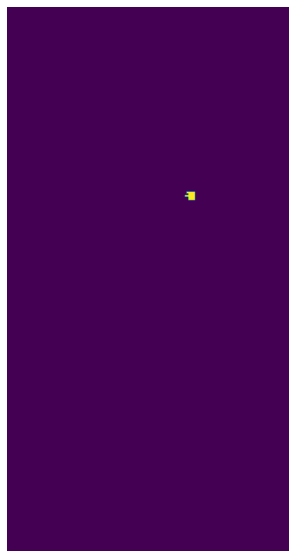

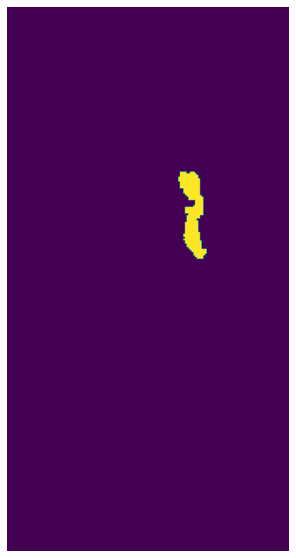

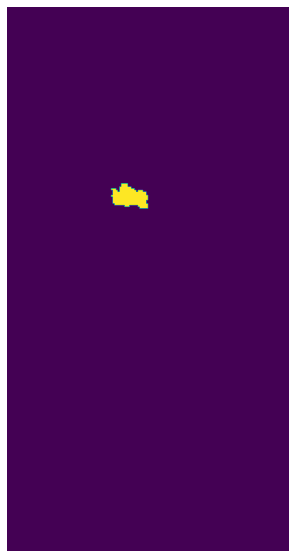

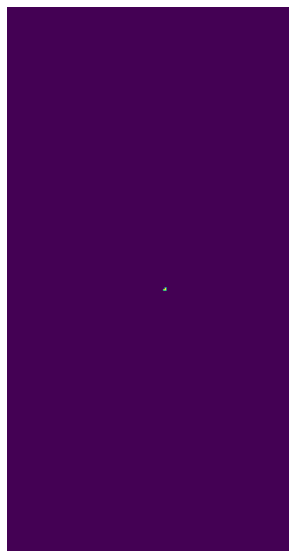

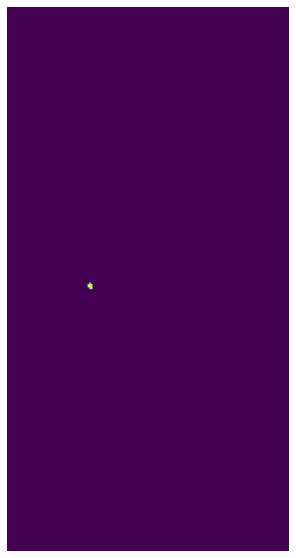

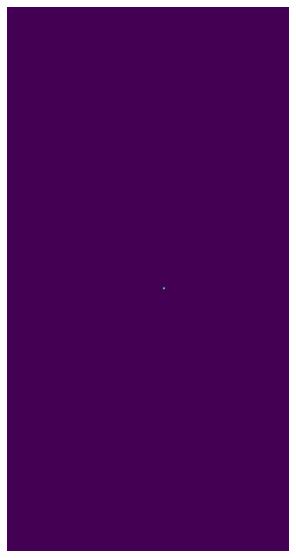

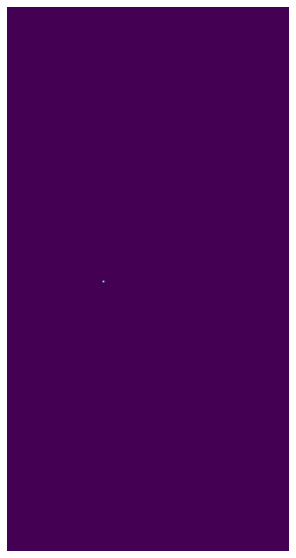

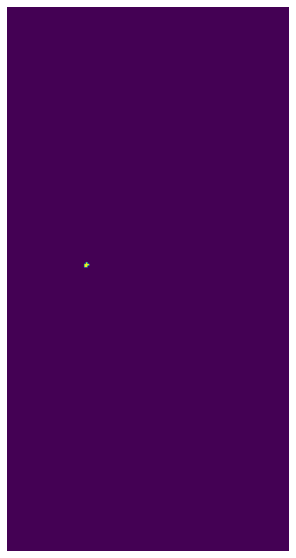

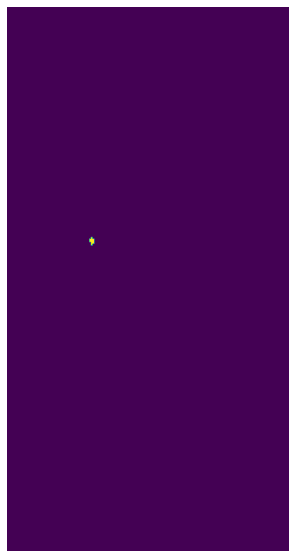

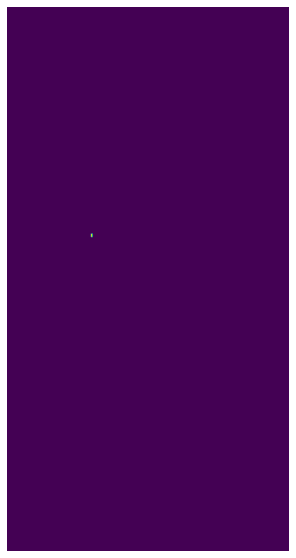

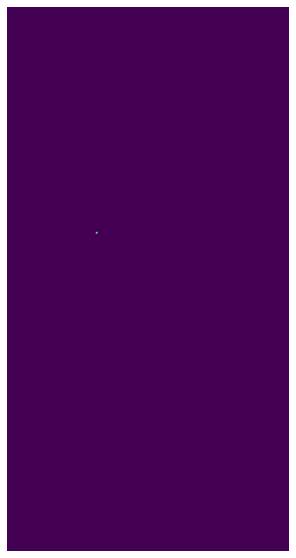

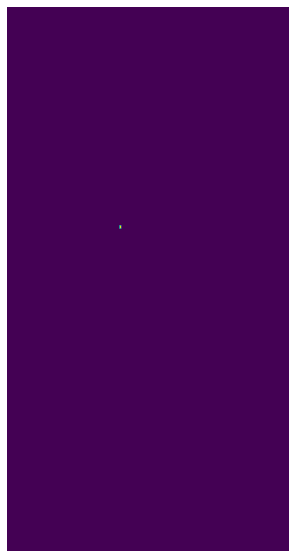

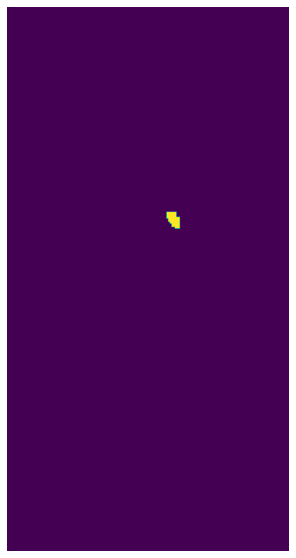

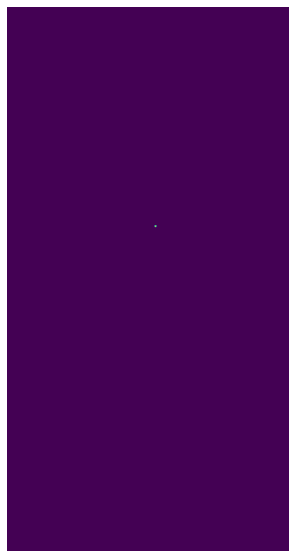

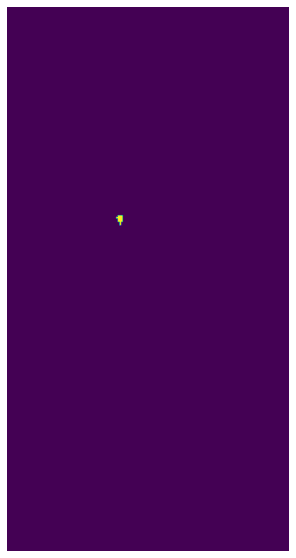

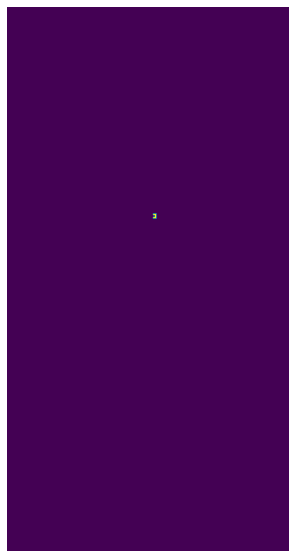

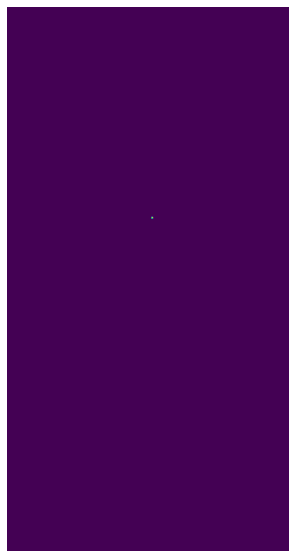

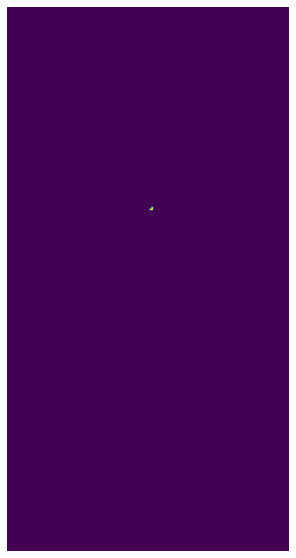

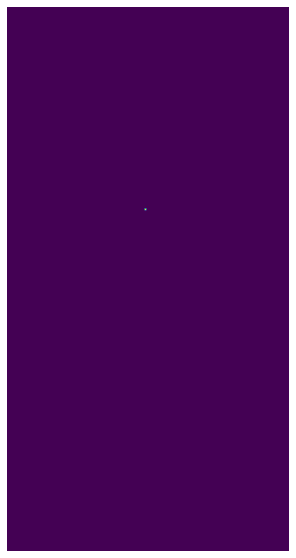

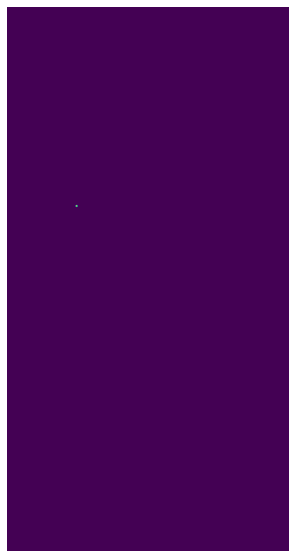

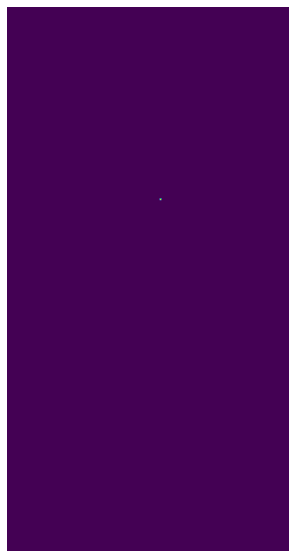

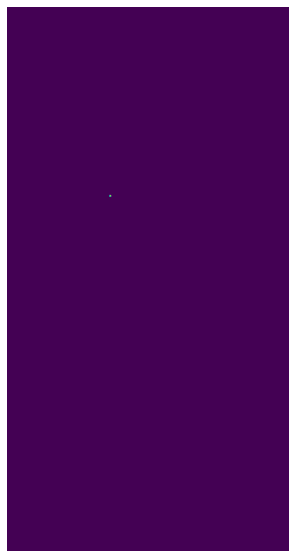

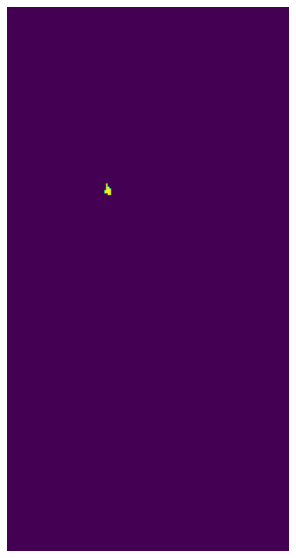

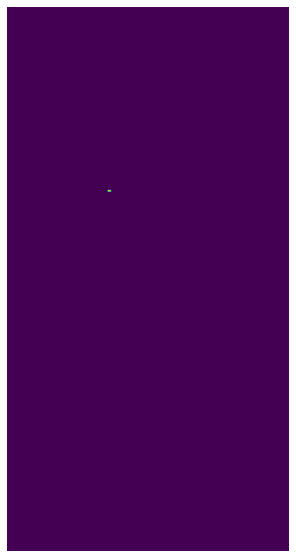

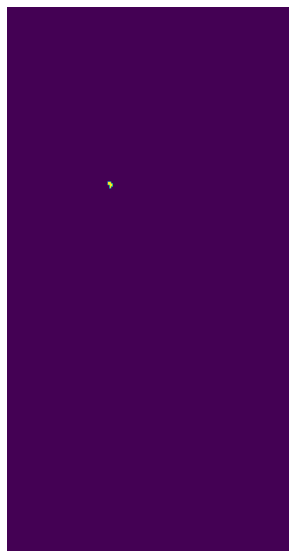

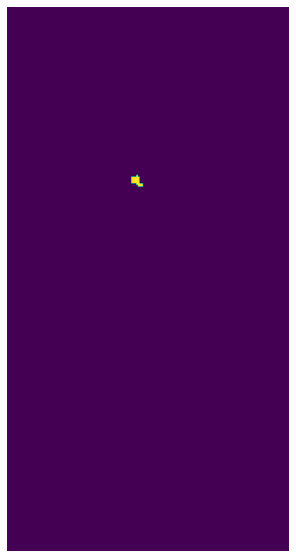

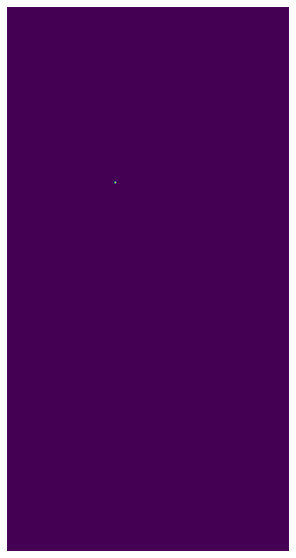

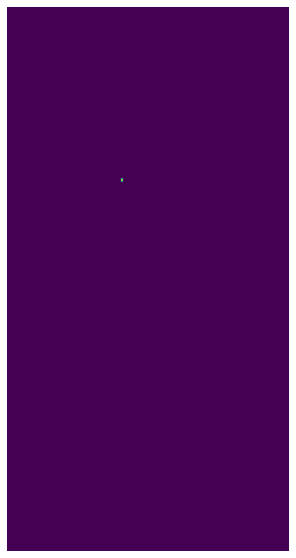

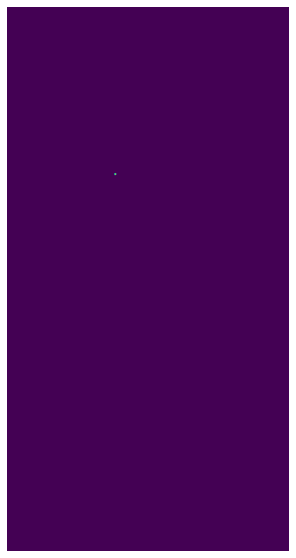

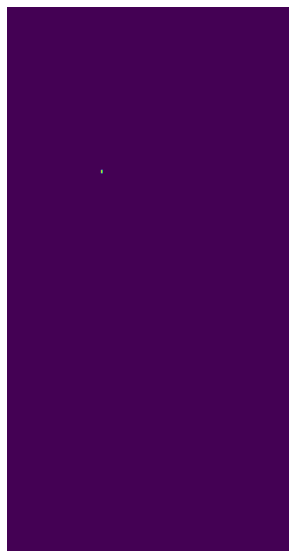

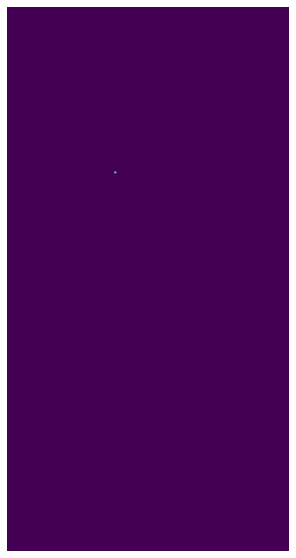

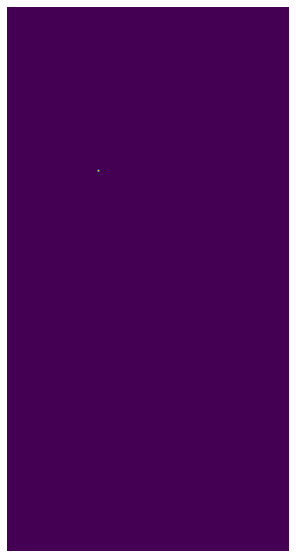

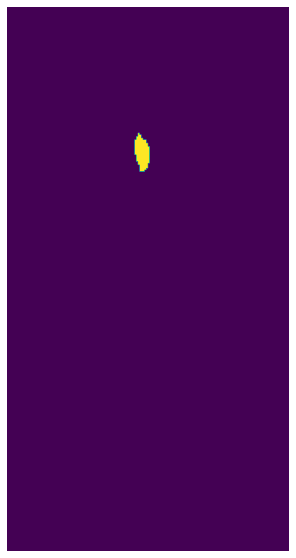

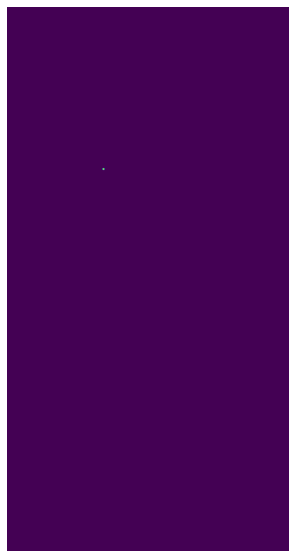

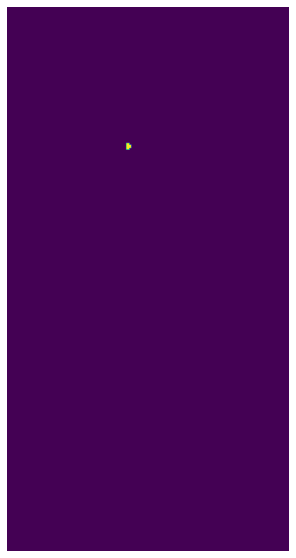

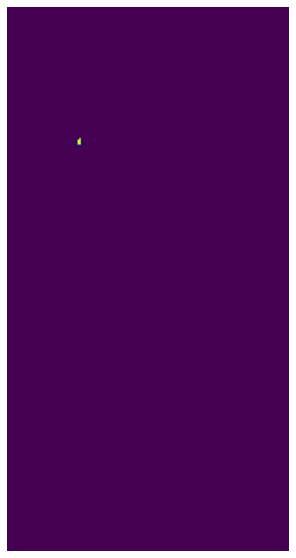

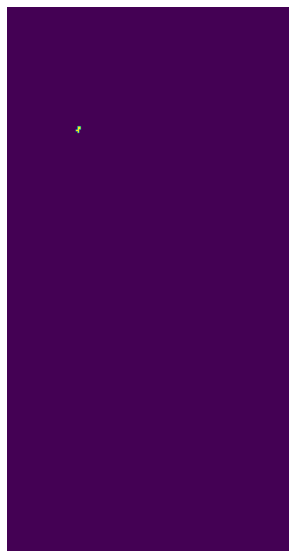

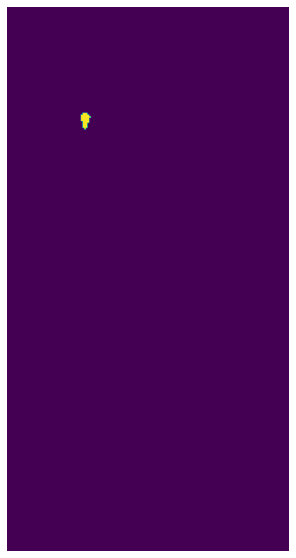

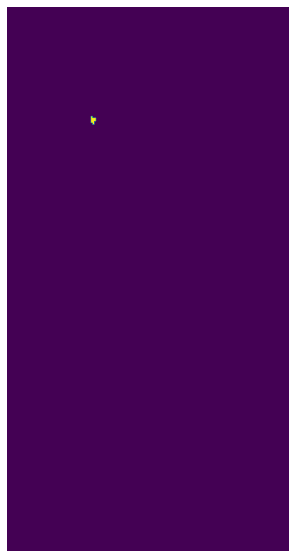

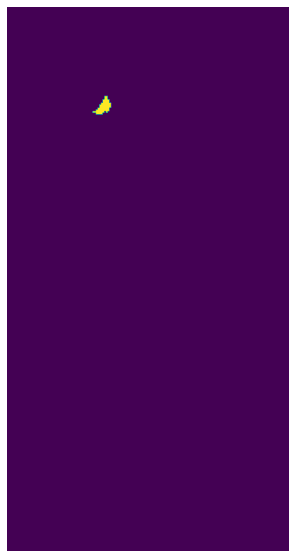

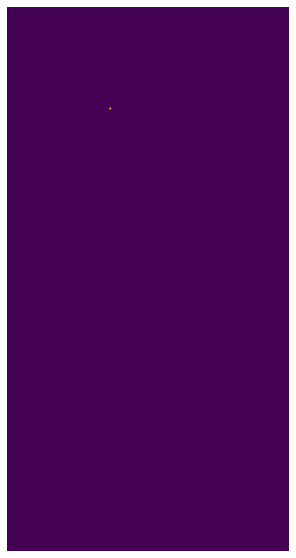

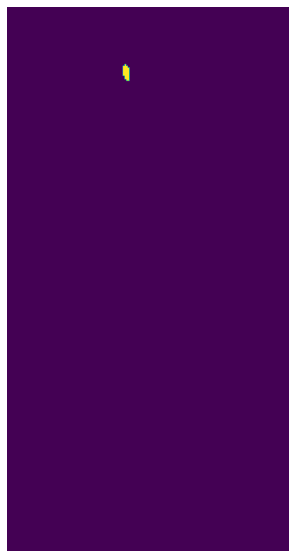

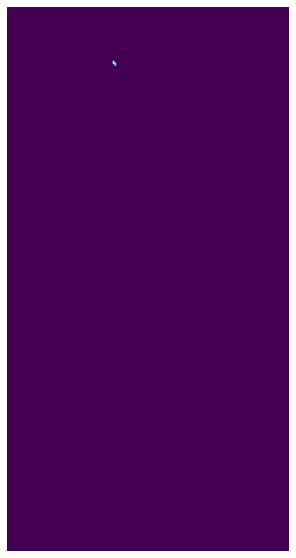

In [12]:
for i in range(1, 62):
    new_mask = np.zeros((model.size_matrix))
    x,y,z = np.where(ws_array == i)

    for j in range(len(x)):
        new_mask[x[j], y[j], z[j]] = i

    mip_imshow(new_mask, 90, cmap='viridis', type='mask')

In [ ]:
#difference with juste connected component 

In [9]:
labelle_array = model.get_labelled_threshold_mask_array(model.get_labelled_threshold_mask_img(model.get_binary_threshold_mask_img(0.41)))

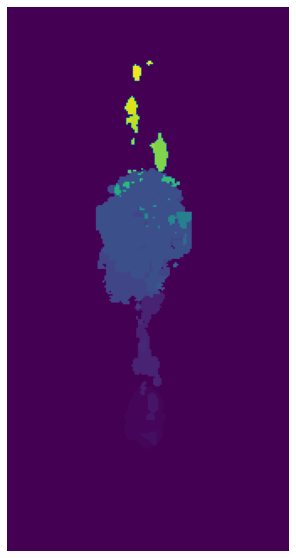

In [10]:
mip_imshow(labelle_array, 0, cmap = 'viridis', type = 'mask')

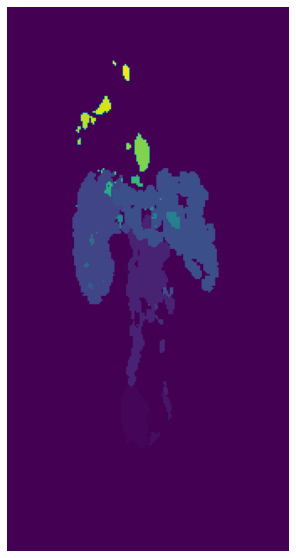

In [11]:
mip_imshow(labelle_array, 90, cmap = 'viridis', type = 'mask')